Read in the covid_avg_deaths.csv file into a pandas DataFrame, and assign the result to a variable named death_toll.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
death_toll=pd.read_csv("covid_avg_deaths.csv")

I collected the data from the [WHO](#https://covid19.who.int) on December 15th, 2020

 we see the first five rows of the data:

In [5]:
death_toll.head(5)

,Month,New_deaths
0,1,0
1,2,0
2,3,77
3,4,1844
4,5,1448


- Month: the month number.
- New_Deaths: the number of daily average deaths for each month. A value of 1,844 for April means that for each day of April, there were 1,844 deaths, on average.

The storytelling data visualization we first showed emphasizes four periods:

- January–March
- March–June
- June–October
- October–December

Text(10.5, 600, 'Oct - Dec')

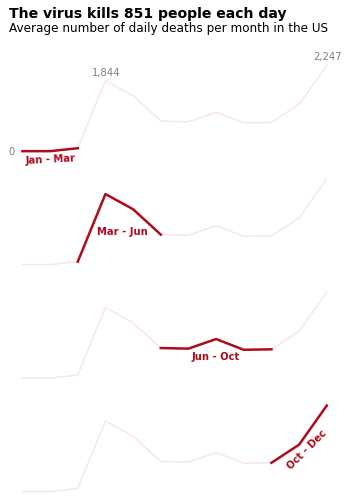

In [7]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')

ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')

ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)



The progress bars follow the change in the total number of cumulative deaths over the four highlighted periods. They represent a detailed breakdown of the death toll in the United States.

The progress bars all indicate the same quantity, so we need to modify them as a function of the cumulative number of deaths. Inside the code block below, we see three lists:
- deaths: the number of cumulative deaths at the end of March, June, October, and December (note: we collected the December data on December 15th).
- proportions: the proportion of deaths for each of those months relative to the current death toll (December 15th).
- xmax_vals: the values we'll need to use for the xmax parameter of Axes.axhline() to control its length. We multiplied each proportion by 0.3 because xmax - xmin = 0.8 - 0.5 = 0.3.


In [10]:
deaths = [2398, 126203, 227178, 295406]
proportions = [round(death/295406, 2) for death in deaths]
xmax_vals = [round(0.5 + proportion * 0.3, 3) for proportion in proportions]
print(proportions)
print(xmax_vals)

[0.01, 0.43, 0.77, 1.0]
[0.503, 0.629, 0.731, 0.8]


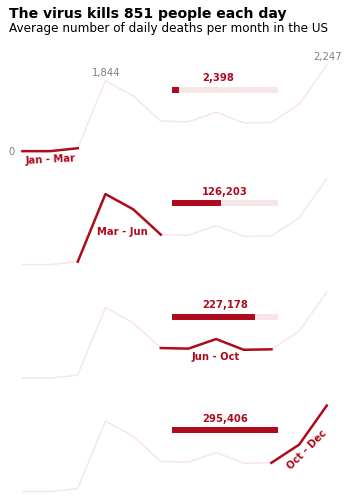

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1,
                                        figsize=(6,8))
axes = [ax1, ax2, ax3, ax4]
for ax in axes:
    ax.plot(death_toll['Month'], death_toll['New_deaths'],
            color='#af0b1e', alpha=0.1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.tick_params(bottom=0, left=0) 
    for location in ['left', 'right', 'top', 'bottom']:
        ax.spines[location].set_visible(False)
        
ax1.plot(death_toll['Month'][:3], death_toll['New_deaths'][:3],
         color='#af0b1e', linewidth=2.5)
ax1.text(0.5, -80, '0', alpha=0.5)
ax1.text(3.5, 2000, '1,844', alpha=0.5)
ax1.text(11.5, 2400, '2,247', alpha=0.5)
ax1.text(1.1, -300, 'Jan - Mar', color='#af0b1e',
         weight='bold', rotation=3)
ax1.text(0.5, 3500, 'The virus kills 851 people each day',
         size=14, weight='bold')
ax1.text(0.5, 3150, 'Average number of daily deaths per month in the US',
         size=12) 

ax2.plot(death_toll['Month'][2:6], death_toll['New_deaths'][2:6],
         color='#af0b1e', linewidth=2.5)
ax2.text(3.7, 800, 'Mar - Jun', color='#af0b1e', weight='bold')


ax3.plot(death_toll['Month'][5:10], death_toll['New_deaths'][5:10],
         color='#af0b1e', linewidth=2.5)
ax3.text(7.1, 500, 'Jun - Oct', color='#af0b1e', weight='bold')
ax4.plot(death_toll['Month'][9:12], death_toll['New_deaths'][9:12],
         color='#af0b1e', linewidth=2.5)
ax4.text(10.5, 600, 'Oct - Dec', color='#af0b1e', weight='bold',
        rotation=45)
for ax, xmax, death in zip(axes, xmax_vals, deaths):
    ax.axhline(y=1600, xmin=0.5, xmax=0.8,
               linewidth=6, color='#af0b1e',
               alpha=0.1)
    ax.axhline(y=1600, xmin=0.5, xmax=xmax,
               linewidth=6, color='#af0b1e')
    ax.text(7.5, 1850, format(death, ','),
            color='#af0b1e', weight='bold')
plt.show()



This data story shows the evolution of the death toll in the United States. At the end of March, we see the death toll at 2,398 deaths, but in December, it became 295,406 — it has changed

